In [143]:
# Import needed moduls

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [144]:
# Load data

titanic_train = pd.read_csv("data/train.csv", index_col='PassengerId')
titanic_test = pd.read_csv("data/test.csv", index_col='PassengerId')
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [145]:
# Delete no needed (for my opinion) columns

titanic_train.drop(labels=["Ticket", "Cabin"], axis=1, inplace=True)
titanic_test.drop(labels=["Ticket", "Cabin"], axis=1, inplace=True)
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [146]:
# Check null values
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


In [147]:
# Fill 'Age' column nones by median value
titanic_train["Age"].fillna(titanic_train["Age"].median(), inplace=True)
titanic_train["Fare"].fillna(titanic_train["Fare"].median(), inplace=True)
titanic_train["Embarked"].fillna(titanic_train["Embarked"].mode()[0], inplace=True)

titanic_test["Age"].fillna(titanic_test["Age"].median(), inplace=True)
titanic_test["Fare"].fillna(titanic_test["Fare"].median(), inplace=True)
titanic_test["Embarked"].fillna(titanic_test["Embarked"].mode()[0], inplace=True)
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [148]:
# Create new 'Age' column for every age range
for i in range(0, int(titanic_train["Age"].max()//16)):
    titanic_train[f"Age{i}"] = titanic_train["Age"].map(lambda x: int(x >= 16*i and x < 16*(i+1)))
    titanic_test[f"Age{i}"] = titanic_test["Age"].map(lambda x: int(x >= 16*i and x < 16*(i+1)))
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age0,Age1,Age2,Age3,Age4
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,1,0,0,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0,0,1,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,1,0,0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0,0,1,0,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,0,1,0,0


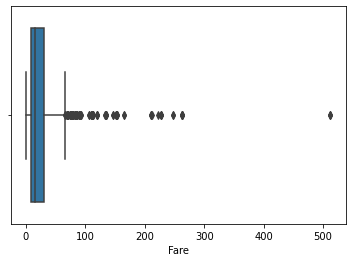

In [149]:
# Check values distribution 
sns.boxplot(x=titanic_train['Fare']);

In [150]:
# Create 'Rich' column
titanic_train["Rich"] = titanic_train["Fare"].map(lambda x: int(x >= 80))
titanic_test["Rich"] = titanic_test["Fare"].map(lambda x: int(x >= 80))

# Create new 'Fare' column for every Fare range
for i in range(0, 6):
    titanic_train[f"Fare{i}"] = titanic_train["Fare"].map(lambda x: int(x >= 20*i and x < 20*(i+1)) if x < 80 else 0)
    titanic_test[f"Fare{i}"] = titanic_test["Fare"].map(lambda x: int(x >= 20*i and x < 20*(i+1)) if x < 80 else 0)
titanic_train.head()

# Delete not needed columns
titanic_train.drop(["Fare", "Age"], axis=1, inplace=True)
titanic_test.drop(["Fare", "Age"], axis=1, inplace=True)

titanic_train.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Embarked,Age0,Age1,Age2,Age3,Age4,Rich,Fare0,Fare1,Fare2,Fare3,Fare4,Fare5
PassengerId,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1,0,S,0,1,0,0,0,0,1,0,0,0,0,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,C,0,0,1,0,0,0,0,0,0,1,0,0
3,1,3,"Heikkinen, Miss. Laina",female,0,0,S,0,1,0,0,0,0,1,0,0,0,0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,S,0,0,1,0,0,0,0,0,1,0,0,0
5,0,3,"Allen, Mr. William Henry",male,0,0,S,0,0,1,0,0,0,1,0,0,0,0,0


In [151]:
# Converting categorical string feature to binominal integer

titanic_train["Sex"] = titanic_train["Sex"].apply(lambda x: 1 if x=="male" else 0)
titanic_test["Sex"] = titanic_test["Sex"].apply(lambda x: 1 if x=="male" else 0)
titanic_train.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Embarked,Age0,Age1,Age2,Age3,Age4,Rich,Fare0,Fare1,Fare2,Fare3,Fare4,Fare5
PassengerId,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,1,0,S,0,1,0,0,0,0,1,0,0,0,0,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,C,0,0,1,0,0,0,0,0,0,1,0,0
3,1,3,"Heikkinen, Miss. Laina",0,0,0,S,0,1,0,0,0,0,1,0,0,0,0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,S,0,0,1,0,0,0,0,0,1,0,0,0
5,0,3,"Allen, Mr. William Henry",1,0,0,S,0,0,1,0,0,0,1,0,0,0,0,0


In [152]:
# Create new 'Embarked' column for every Embarked place
titanic_train = pd.concat([titanic_train, 
                           pd.get_dummies(titanic_train["Embarked"], prefix='Embarked')],
                           axis=1)
titanic_test = pd.concat([titanic_test, 
                           pd.get_dummies(titanic_test["Embarked"], prefix='Embarked')],
                           axis=1)

titanic_train.drop(["Embarked"], axis=1, inplace=True)
titanic_test.drop(["Embarked"], axis=1, inplace=True)

In [153]:
titanic_train.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Age0,Age1,Age2,Age3,...,Rich,Fare0,Fare1,Fare2,Fare3,Fare4,Fare5,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3,1,3,"Heikkinen, Miss. Laina",0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
5,0,3,"Allen, Mr. William Henry",1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1


IsAlone
False    50.564972
True     30.353818
Name: Survived, dtype: float64


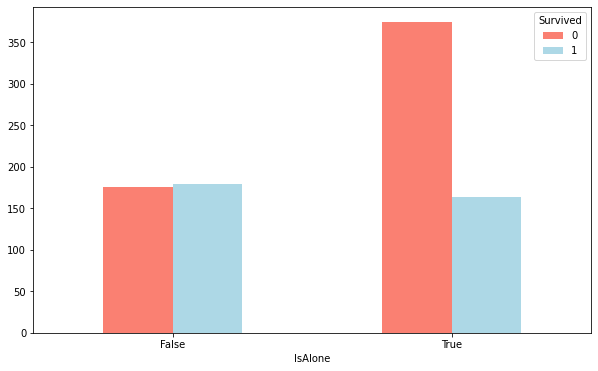

In [154]:
# Create 'IsAlone' column
titanic_train['IsAlone'] = ((titanic_train['SibSp']==0) & (titanic_train['Parch']==0))
titanic_test['IsAlone'] = ((titanic_test['SibSp']==0) & (titanic_test['Parch']==0)).astype('int')

# Drop not needed feature
titanic_train = titanic_train.drop(['Parch', 'SibSp'], axis=1)
titanic_test = titanic_test.drop(['Parch', 'SibSp'], axis=1)

# Check survived depending on 'IsAlone' 
titanic_train['IsAlone'].head()
pd.crosstab(titanic_train['IsAlone'], 
            titanic_train['Survived']).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"]);

# Check part of survived depending on 'IsAlone' 
print(titanic_train.groupby(['IsAlone'])['Survived'].mean()*100)

# Keep the labels on the x-axis vertical
plt.xticks(rotation=0); 

In [155]:
# Find title of each person 
titanic_train['Title'] = titanic_train['Name'].str.extract('([A-Za-z]+)\.')
titanic_train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [156]:
# Bug fixes (maybe)
titanic_train['Title'] = titanic_train['Title'].replace(['Mlle','Ms'], 'Miss')
titanic_train['Title'] = titanic_train['Title'].replace('Mme', 'Mrs')

titanic_train['Title'].value_counts()

Mr          517
Miss        185
Mrs         126
Master       40
Dr            7
Rev           6
Major         2
Col           2
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: Title, dtype: int64

In [157]:
# Replace rare (<= 7) title to 'Rare'
titanic_train['Title'] = titanic_train['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
                                                         'Don', 'Dr', 'Major', 'Rev', 'Sir',\
                                                         'Jonkheer', 'Dona'], 'Rare')

titanic_train['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64

In [158]:
# Convert to numbers and fill missing
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
titanic_train['Title'] = titanic_train['Title'].map(title_mapping)
titanic_train['Title'] = titanic_train['Title'].fillna(0)

# Drop not needed feature
titanic_train = titanic_train.drop('Name', axis=1)


titanic_train.head()

,Survived,Pclass,Sex,Age0,Age1,Age2,Age3,Age4,Rich,Fare0,Fare1,Fare2,Fare3,Fare4,Fare5,Embarked_C,Embarked_Q,Embarked_S,IsAlone,Title
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0,3,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,False,1
2,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,False,3
3,1,3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,True,2
4,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,False,3
5,0,3,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,True,1


In [159]:
# Same process for test df
titanic_test['Title'] = titanic_test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

titanic_test['Title'] = titanic_test['Title'].replace(['Mlle','Ms'], 'Miss')
titanic_test['Title'] = titanic_test['Title'].replace('Mme', 'Mrs')
    
titanic_test['Title'] = titanic_test['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
                                                         'Don', 'Dr', 'Major', 'Rev', 'Sir',\
                                                         'Jonkheer', 'Dona'], 'Rare')

titanic_test['Title'] = titanic_test['Title'].map(title_mapping)
titanic_test['Title'] = titanic_test['Title'].fillna(0)

titanic_test = titanic_test.drop('Name', axis=1)

In [160]:
# Splitting the dataset on training and validating
from sklearn.model_selection import train_test_split

X = titanic_train.drop("Survived", axis=1)
y = titanic_train["Survived"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [161]:
# Import different model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [162]:
# Create dictionary of models
models = {"LinearSVC": LinearSVC(),
          "KNN": KNeighborsClassifier(),
          "SVC": SVC(),
          "LogisticRegression": LogisticRegression(),
          "RandomForestClassifier": RandomForestClassifier(),
          "XGBoost": xgb.XGBClassifier()}


# Create an empty dictionary for results
results = {}

In [163]:
# Fit and score each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_val, y_val)

# View the results
results

{'LinearSVC': 0.776536312849162,
 'KNN': 0.8044692737430168,
 'SVC': 0.8156424581005587,
 'LogisticRegression': 0.776536312849162,
 'RandomForestClassifier': 0.7988826815642458,
 'XGBoost': 0.8100558659217877}

In [164]:
param_knn = {'n_neighbors': [5, 7, 8, 9, 10, 12, 15, 20],
             'weights': ['uniform', 'distance'],
             'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

# Setup the grid search
grid_knn = GridSearchCV(KNeighborsClassifier(),
                        param_knn,
                        cv=5)

# Fit the grid search to the data
grid_knn.fit(X_train, y_train)

# Find the best parameters
grid_knn.best_params_, grid_knn.best_score_

({'algorithm': 'kd_tree', 'n_neighbors': 12, 'weights': 'uniform'},
 0.8117797695262483)

In [165]:
grid_knn.best_estimator_.fit(X_train, y_train)
grid_knn.best_estimator_.score(X_val, y_val)

0.7877094972067039

In [166]:
print(f"Accuracy {np.mean(cross_val_score(grid_knn.best_estimator_, X, y, cv=5, scoring='accuracy'))}")
print(f"Recall {np.mean(cross_val_score(grid_knn.best_estimator_, X, y, cv=5, scoring='recall'))}")
print(f"Precision {np.mean(cross_val_score(grid_knn.best_estimator_, X, y, cv=5, scoring='precision'))}")
print(f"F1 {np.mean(cross_val_score(grid_knn.best_estimator_, X, y, cv=5, scoring='f1'))}")

Accuracy 0.7878601468834348
Recall 0.6460358056265985
Precision 0.7657510500394384
F1 0.6987982477730642


In [167]:
param_RFC = {'n_estimators': [i for i in range(1, 106, 15)],
             'max_depth': [i for i in range(1, 31, 3)]}

# Setup the grid search
grid_RFC = GridSearchCV(RandomForestClassifier(random_state=42),
                        param_RFC,
                        cv=5)

# Fit the grid search to the data
grid_RFC.fit(X_train, y_train)

# Find the best parameters
grid_RFC.best_params_, grid_RFC.best_score_

({'max_depth': 7, 'n_estimators': 46}, 0.8244065793361568)

In [168]:
#Check score of estimator (accuracy)
grid_RFC.best_estimator_.fit(X_train, y_train)
grid_RFC.best_estimator_.score(X_val, y_val)

0.7877094972067039

In [169]:
print(f"Accuracy {np.mean(cross_val_score(grid_RFC.best_estimator_, X, y, cv=5, scoring='accuracy'))}")
print(f"Recall {np.mean(cross_val_score(grid_RFC.best_estimator_, X, y, cv=5, scoring='recall'))}")
print(f"Precision {np.mean(cross_val_score(grid_RFC.best_estimator_, X, y, cv=5, scoring='precision'))}")
print(f"F1 {np.mean(cross_val_score(grid_RFC.best_estimator_, X, y, cv=5, scoring='f1'))}")

Accuracy 0.8103257799259307
Recall 0.6986359761295823
Precision 0.7840083776186673
F1 0.7368877540918102


In [170]:
# Tune hyperparams of XGBClassifier

param_xgb = {
    "max_depth": [3, 5, 9],
    "learning_rate": [0.01, 0.1, 0.3, 1],
    "gamma": [0,  1, 3],
    "reg_alpha": [0, 1, 10],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 5]
}

# Setup the grid search
grid_xgb = GridSearchCV(xgb.XGBClassifier(random_state=42), 
                        param_xgb,
                        cv=5)

# Fit the grid search to the data
grid_xgb.fit(X_train, y_train)

# Find the best parameters
grid_xgb.best_params_, grid_xgb.best_score_

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_alpha=0, reg_lambda=0, scale_pos_weight=1; total time=   0.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_alpha=0, reg_lambda=0, scale_pos_weight=1; total time=   0.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_alpha=0, reg_lambda=0, scale_pos_weight=1; total time=   0.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_alpha=0, reg_lambda=0, scale_pos_weight=1; total time=   0.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_alpha=0, reg_lambda=0, scale_pos_weight=1; total time=   0.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_alpha=0, reg_lambda=0, scale_pos_weight=5; total time=   0.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_alpha=0, reg_lambda=0, scale_pos_weight=5; total time=   0.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_alpha=0, reg_lambda=0, scale_pos_weight=5; total time=   0.0s


KeyboardInterrupt: 

In [ ]:
#Check score of estimator (accuracy)
grid_xgb.best_estimator_.fit(X_train, y_train)
grid_xgb.best_estimator_.score(X_val, y_val)

In [ ]:
print(f"Accuracy {np.mean(cross_val_score(grid_xgb.best_estimator_, X, y, cv=5, scoring='accuracy'))}")
print(f"Recall {np.mean(cross_val_score(grid_xgb.best_estimator_, X, y, cv=5, scoring='recall'))}")
print(f"Precision {np.mean(cross_val_score(grid_xgb.best_estimator_, X, y, cv=5, scoring='precision'))}")
print(f"F1 {np.mean(cross_val_score(grid_xgb.best_estimator_, X, y, cv=5, scoring='f1'))}")

In [171]:
X_train.head()

,Pclass,Sex,Age0,Age1,Age2,Age3,Age4,Rich,Fare0,Fare1,Fare2,Fare3,Fare4,Fare5,Embarked_C,Embarked_Q,Embarked_S,IsAlone,Title
PassengerId,,,,,,,,,,,,,,,,,,,
332,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,True,1
734,2,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,True,1
383,3,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,True,1
705,3,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,False,1
814,3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,False,2


In [172]:
titanic_test.head()

,Pclass,Sex,Age0,Age1,Age2,Age3,Age4,Rich,Fare0,Fare1,Fare2,Fare3,Fare4,Fare5,Embarked_C,Embarked_Q,Embarked_S,IsAlone,Title
PassengerId,,,,,,,,,,,,,,,,,,,
892,3,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,1
893,3,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,3
894,2,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1
895,3,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1
896,3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,3


In [173]:
X_train.shape, titanic_test.shape

((712, 19), (418, 19))

In [174]:
preds = grid_xgb.best_estimator_.predict(titanic_test)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [175]:
# Create resulting dataframe with predictions

result_predictions = pd.DataFrame({"PassengerId":np.arange(892, 1310),
                                   "Survived" :preds})
result_predictions

# Save result to csv file

result_predictions.to_csv("data/my_predictions_xgb_full.csv", index=False)

In [ ]:
preds1 = models['SVC'].predict(titanic_test)

In [ ]:
# Create resulting dataframe with predictions

result_predictions = pd.DataFrame({"PassengerId":np.arange(892, 1310),
                                   "Survived" :preds1})
result_predictions

# Save result to csv file

result_predictions.to_csv("data/my_predictions_xgb_SVC.csv", index=False)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=models['SVC'], X=X_val, y=y_val)